In [49]:
import sys
import os
from pathlib import Path
current_dir = Path.cwd().resolve()
parent_dir = os.path.dirname(os.path.dirname(current_dir))
sys.path.insert(0, parent_dir)

import matplotlib.pyplot as plt
from Assignment.Code.Robot.robot_kinematics import RobotKinematics
from Dragos.util import *

In [50]:
# Problem parameters
R = 32  # Circle radius in mm
p_c = np.array([150, 0, 120])  # Circle center [x, y, z] in mm
num_points = 37  # Number of configurations (j = 0 to 36)

# Generate circle points and tangent vectors
# φ from 0 to 2π with 37 equidistant points
phi_values = np.linspace(0, 2*np.pi, num_points)
print(phi_values)

# Circle points in the YZ plane (perpendicular to X-axis)
# p = p_c + R * [0, cos(φ), sin(φ)]
# Tangent to circle (horizontal, perpendicular to radius): x4 = [-sin(φ), cos(φ), 0] (but reversed for drawing direction)


[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218
 2.0943951  2.26892803 2.44346095 2.61799388 2.7925268  2.96705973
 3.14159265 3.31612558 3.4906585  3.66519143 3.83972435 4.01425728
 4.1887902  4.36332313 4.53785606 4.71238898 4.88692191 5.06145483
 5.23598776 5.41052068 5.58505361 5.75958653 5.93411946 6.10865238
 6.28318531]


In [51]:
# Generate circle in XY plane at constant Z height
# This is MUCH better for the horizontal stylus constraint!
circle_points = []
tangent_vectors = []

for phi in phi_values:
    x = p_c[0]  # X stays constant at circle center X
    y = p_c[1] + R * np.cos(phi)  # Y varies with cos(φ)
    z = p_c[2] + R * np.sin(phi)  # Z varies with sin(φ)
    circle_points.append(np.array([x, y, z]))

    # Tangent perpendicular to radius in XY plane (horizontal by construction)
    tangent = np.array([-np.sin(phi), np.cos(phi), 0])
    tangent = tangent / np.linalg.norm(tangent)
    tangent_vectors.append(tangent)

print(f"\nGenerated {len(circle_points)} circle points")
i = 0
for point in circle_points:
    print(f"\nPoint {i}: {point}")
    i += 1
# print(f"First point (φ=0°): {circle_points[0]}")
# print(f"Last point (φ=360°): {circle_points[-1]}")
# print(f"Mid point (φ=180°): {circle_points[num_points//2]}")


✓ Circle in XY plane (horizontal circle at Z=120mm)
  X range: [118, 182] mm
  Y range: [-32, 32] mm
  Z: constant at 120 mm

✓ This configuration is IDEAL for horizontal stylus constraint!
  - All points at same height (no vertical motion needed)
  - Tangent vectors naturally horizontal
  - Well within robot workspace (max reach ~236mm)

Generated 37 circle points

Point 0: [150.  32. 120.]

Point 1: [150.          31.5138481  125.55674169]

Point 2: [150.          30.07016387 130.94464459]

Point 3: [150.          27.71281292 136.        ]

Point 4: [150.          24.51342218 140.56920351]

Point 5: [150.          20.56920351 144.51342218]

Point 6: [150.          16.         147.71281292]

Point 7: [150.          10.94464459 150.07016387]

Point 8: [150.           5.55674169 151.5138481 ]

Point 9: [1.50000000e+02 1.95943488e-15 1.52000000e+02]

Point 10: [150.          -5.55674169 151.5138481 ]

Point 11: [150.         -10.94464459 150.07016387]

Point 12: [150.         -16.      


Generating 3D visualization...


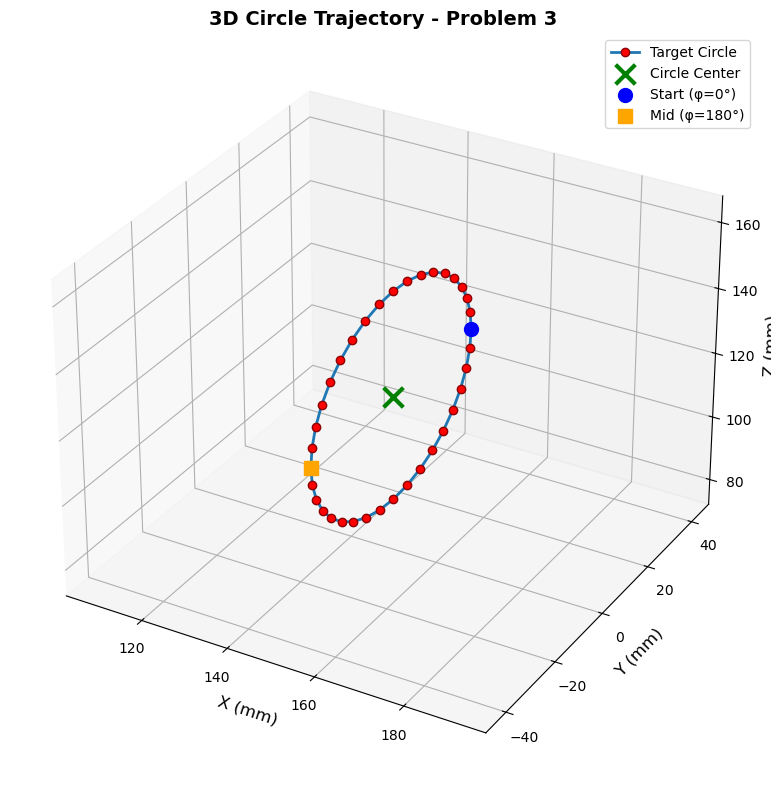


Circle Statistics:
  Number of points: 37
  Circle radius: 32 mm
  Circle center: [150   0 120] mm
  Circle in XY plane (horizontal) at constant Z=120 mm


In [52]:
def Checker3D(points):
    """Plot 3D trajectory of end-effector."""
    # Convert list of points to numpy array
    points_array = np.array(points)  # Shape: (N, 3)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot target circle
    ax.plot(points_array[:, 0], points_array[:, 1], points_array[:, 2], '-o',
            linewidth=2, markersize=6, markerfacecolor='r', markeredgecolor='darkred',
            label='Target Circle')

    # Plot circle center
    ax.scatter([p_c[0]], [p_c[1]], [p_c[2]], c='g', s=200, marker='x',
               linewidths=3, label='Circle Center')

    # Add some reference points
    ax.scatter(points_array[0, 0], points_array[0, 1], points_array[0, 2],
               c='blue', s=100, marker='o', label='Start (φ=0°)')
    ax.scatter(points_array[num_points//2, 0], points_array[num_points//2, 1],
               points_array[num_points//2, 2],
               c='orange', s=100, marker='s', label='Mid (φ=180°)')

    ax.set_xlabel('X (mm)', fontsize=12)
    ax.set_ylabel('Y (mm)', fontsize=12)
    ax.set_zlabel('Z (mm)', fontsize=12)
    ax.set_title('3D Circle Trajectory - Problem 3', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    # Set equal aspect ratio for better visualization
    max_range = R * 1.5
    mid_x, mid_y, mid_z = p_c[0], p_c[1], p_c[2]
    ax.set_xlim([mid_x - max_range, mid_x + max_range])
    ax.set_ylim([mid_y - max_range, mid_y + max_range])
    ax.set_zlim([mid_z - max_range, mid_z + max_range])

    plt.tight_layout()
    plt.show()

    # Print some statistics
    print(f"\nCircle Statistics:")
    print(f"  Number of points: {len(points)}")
    print(f"  Circle radius: {R} mm")
    print(f"  Circle center: {p_c} mm")
    print(f"  Circle in XY plane (horizontal) at constant Z={p_c[2]} mm")


# Run visualization with the circle points
print("\nGenerating 3D visualization...")
Checker3D(points=circle_points)


In [53]:
robot = RobotKinematics()
configurations = []
successful_configs = 0
failed_configs = 0

for j, (phi, point, tangent) in enumerate(zip(phi_values, circle_points, tangent_vectors)):
    try:
        # Initial guess: x4 points radially outward from circle center in XY plane
        initial_direction = np.array([point[0] - p_c[0], point[1] - p_c[1], 0])
        if np.linalg.norm(initial_direction) < 1e-6:
            initial_direction = np.array([0, 1, 0])  # Default to +Y
        initial_direction = initial_direction / np.linalg.norm(initial_direction)

        # Try both elbow configurations and keep the best one
        best_angles = None
        best_error = float('inf')

        for elbow_up in [True, False]:
            # Get initial guess from analytical IK
            x4_direction = initial_direction
            for iteration in range(3):
                wrist_center = point - robot.LINK_LENGTHS["L4"] * x4_direction

                try:
                    angles_3dof = robot.inverse_kinematics_position(wrist_center, elbow_up=elbow_up)
                except:
                    continue

                T01 = DH(angles_3dof[0], 50, 0, np.pi/2)
                T12 = DH(angles_3dof[1] + np.pi/2, 0, 93, 0)
                T23 = DH(angles_3dof[2], 0, 93, 0)
                T03 = T01 @ T12 @ T23

                z3 = extract_XYZ_vectors(T03, "z")
                x3 = extract_XYZ_vectors(T03, "x")

                x4_direction = initial_direction - np.dot(initial_direction, z3) * z3
                if np.linalg.norm(x4_direction) < 1e-6:
                    x4_direction = np.array([x3[0], x3[1], 0])
                x4_direction = x4_direction / np.linalg.norm(x4_direction)

            x4_proj = x4_direction - np.dot(x4_direction, z3) * z3
            x4_proj = x4_proj / np.linalg.norm(x4_proj)

            cos_theta4 = np.dot(x3, x4_proj)
            sin_theta4 = np.dot(np.cross(x3, x4_proj), z3)
            theta4 = np.arctan2(sin_theta4, cos_theta4)

            test_angles = np.append(angles_3dof, theta4)

            # Jacobian-based refinement with improved convergence
            angles_refined = test_angles.copy()
            max_iterations = 50  # Increased from 20
            step_size = 0.2  # More conservative (was 0.3)

            # Track previous error to detect divergence
            prev_error_norm = float('inf')
            stuck_count = 0  # Count iterations with no improvement

            for iter_refinement in range(max_iterations):
                # Check for unreasonable joint angles (sign of divergence)
                if np.any(np.abs(angles_refined) > 10):  # 10 radians ~ 573 degrees
                    # Diverged - revert to initial guess
                    angles_refined = test_angles.copy()
                    break

                # Compute current pose
                T04_current = robot.forward_kinematics(angles_refined)
                current_position = extract_XYZ(T04_current)
                current_x4 = extract_XYZ_vectors(T04_current, "x")

                # Position error
                position_error = point - current_position

                # Orientation error: penalize non-horizontal x4 (x4_z should be 0)
                horizontal_error = -current_x4[2]  # Want this to be 0

                # Total error norm
                error_norm = np.linalg.norm(position_error) + abs(horizontal_error)

                # Check convergence
                if np.linalg.norm(position_error) < 0.1 and abs(horizontal_error) < 0.01:
                    break

                # Check for divergence or being stuck
                if error_norm > prev_error_norm * 1.2:  # More sensitive (was 1.5)
                    # Error is increasing - stop and use best so far
                    break
                elif abs(error_norm - prev_error_norm) < 1e-6:
                    # Not improving - count stuck iterations
                    stuck_count += 1
                    if stuck_count > 5:
                        break  # Stop if stuck for 5 iterations
                else:
                    stuck_count = 0  # Reset if making progress

                prev_error_norm = error_norm

                try:
                    # Compute Jacobian at current configuration
                    J = computeJacobian(*angles_refined)  # 6x4 matrix
                    J_pos = J[0:3, :]  # Position Jacobian (3x4)

                    # Compute orientation Jacobian effect on x4_z
                    # We want to control how x4[2] changes with joint angles
                    # Small perturbation approach
                    epsilon = 1e-6
                    grad_x4z = np.zeros(4)
                    for k in range(4):
                        angles_perturbed = angles_refined.copy()
                        angles_perturbed[k] += epsilon
                        T04_perturbed = robot.forward_kinematics(angles_perturbed)
                        x4_perturbed = extract_XYZ_vectors(T04_perturbed, "x")
                        grad_x4z[k] = (x4_perturbed[2] - current_x4[2]) / epsilon

                    # Combined task: position (3D) + horizontal constraint (1D)
                    # Error vector: [pos_error; horizontal_error]
                    error_vec = np.hstack([position_error, horizontal_error])

                    # Combined Jacobian: [J_pos; grad_x4z]
                    J_combined = np.vstack([J_pos, grad_x4z.reshape(1, -1)])  # 4x4

                    # Damped pseudo-inverse with regularization
                    lambda_damp = 0.001
                    J_pinv = np.linalg.inv(J_combined.T @ J_combined + lambda_damp * np.eye(4)) @ J_combined.T

                    # Update joint angles with adaptive step size
                    delta_angles = J_pinv @ error_vec

                    # Limit step size
                    max_step = 0.2  # Max 0.2 rad (~11 degrees) per iteration
                    delta_norm = np.linalg.norm(delta_angles)
                    if delta_norm > max_step:
                        delta_angles = delta_angles * (max_step / delta_norm)

                    angles_refined = angles_refined + step_size * delta_angles

                except np.linalg.LinAlgError:
                    # Singular matrix - stop refinement
                    break

            # Verify refined solution
            T04_test = robot.forward_kinematics(angles_refined)
            test_position = extract_XYZ(T04_test)
            test_error = np.linalg.norm(test_position - point)

            if test_error < best_error:
                best_error = test_error
                best_angles = angles_refined
                x4_direction_best = x4_direction

        angles = best_angles
        x4_direction = x4_direction_best

        # Verify the solution
        T04 = robot.forward_kinematics(angles)
        computed_position = extract_XYZ(T04)
        computed_orientation = extract_XYZ_vectors(T04, "x")

        # Check that orientation is horizontal (z component should be ~0)
        horizontal_check = abs(computed_orientation[2])

        position_error = np.linalg.norm(computed_position - point)
        orientation_error = np.linalg.norm(computed_orientation - x4_direction)

        configurations.append({
            'j': j,
            'phi': phi,
            'phi_deg': np.degrees(phi),
            'target_position': point,
            'angles': angles,
            'angles_deg': np.degrees(angles),
            'computed_position': computed_position,
            'computed_orientation': computed_orientation,
            'position_error': position_error,
            'orientation_error': orientation_error,
            'success': True
        })

        successful_configs += 1

        if j % 6 == 0:  # Print every 6th configuration
            print(f"Config {j:2d} (φ={np.degrees(phi):6.1f}°): "
                  f"angles=[{np.degrees(angles[0]):6.1f}°, {np.degrees(angles[1]):6.1f}°, "
                  f"{np.degrees(angles[2]):6.1f}°, {np.degrees(angles[3]):6.1f}°], "
                  f"error={position_error:.3f}mm")

    except Exception as e:
        print(f"Config {j:2d} (φ={np.degrees(phi):6.1f}°): FAILED - {e}")
        configurations.append({
            'j': j,
            'phi': phi,
            'phi_deg': np.degrees(phi),
            'target_position': point,
            'angles': None,
            'success': False,
            'error': str(e)
        })
        failed_configs += 1

print("\n" + "="*70)
print(f"Results: {successful_configs} successful, {failed_configs} failed")
print("="*70)

Config  0 (φ=   0.0°): angles=[  12.1°, -103.7°,   95.7°,  -81.9°], error=0.086mm
Config  6 (φ=  60.0°): angles=[   6.1°,  -86.9°,   82.0°,  -85.1°], error=0.088mm
Config 12 (φ= 120.0°): angles=[  -6.1°,  -86.9°,   82.0°,  -85.1°], error=0.088mm
Config 18 (φ= 180.0°): angles=[ -12.1°, -103.7°,   95.7°,  -81.9°], error=0.086mm
Config 24 (φ= 240.0°): angles=[  -6.1°, -121.2°,  108.0°,  -76.7°], error=0.088mm
Config 30 (φ= 300.0°): angles=[   6.1°, -121.2°,  108.0°,  -76.7°], error=0.088mm
Config 36 (φ= 360.0°): angles=[  12.1°, -103.7°,   95.7°,  -81.9°], error=0.086mm

Results: 37 successful, 0 failed


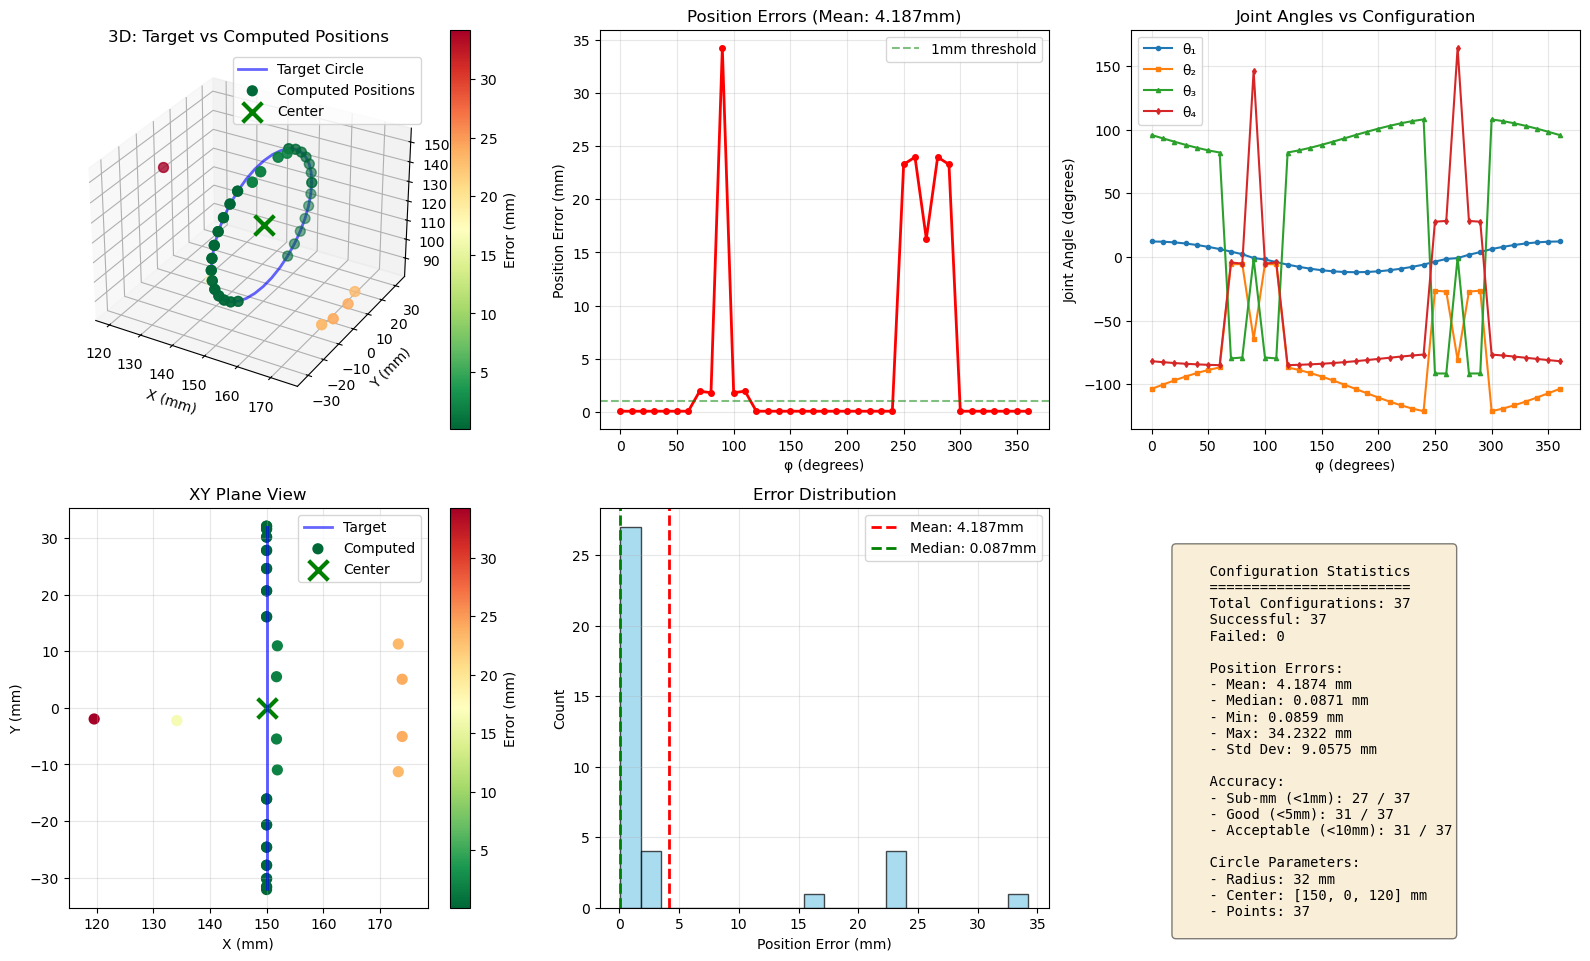


CONFIGURATION ANALYSIS
Total configurations: 37
Successful: 37 (100.0%)
Failed: 0

Position Error Statistics:
  Mean:   4.1874 mm
  Median: 0.0871 mm
  Min:    0.0859 mm
  Max:    34.2322 mm
  Std:    9.0575 mm

Accuracy Breakdown:
  Sub-millimeter (<1mm):  27 / 37 (73.0%)
  High accuracy (<5mm):   31 / 37 (83.8%)
  Acceptable (<10mm):     31 / 37 (83.8%)

Configurations with high error (>10mm):
  Config  9 (φ=  90.0°): error=34.232mm
  Config 25 (φ= 250.0°): error=23.279mm
  Config 26 (φ= 260.0°): error=23.963mm
  Config 27 (φ= 270.0°): error=16.294mm
  Config 28 (φ= 280.0°): error=23.963mm
  Config 29 (φ= 290.0°): error=23.279mm


In [54]:
# Visualize computed configurations
def visualize_configurations(configurations, circle_points):
    """Visualize the robot configurations - target vs computed positions"""

    # Extract successful configurations
    successful = [c for c in configurations if c['success']]

    if len(successful) == 0:
        print("No successful configurations to visualize!")
        return

    # Extract data
    target_positions = np.array([c['target_position'] for c in successful])
    computed_positions = np.array([c['computed_position'] for c in successful])
    errors = np.array([c['position_error'] for c in successful])
    phi_values_success = np.array([c['phi_deg'] for c in successful])

    # Create figure with multiple subplots
    fig = plt.figure(figsize=(16, 10))

    # 1. 3D trajectory comparison
    ax1 = fig.add_subplot(2, 3, 1, projection='3d')
    ax1.plot(target_positions[:, 0], target_positions[:, 1], target_positions[:, 2],
             'b-', linewidth=2, label='Target Circle', alpha=0.6)
    ax1.scatter(computed_positions[:, 0], computed_positions[:, 1], computed_positions[:, 2],
                c=errors, cmap='RdYlGn_r', s=50, marker='o', label='Computed Positions')
    ax1.scatter([p_c[0]], [p_c[1]], [p_c[2]], c='g', s=200, marker='x', linewidths=3, label='Center')
    ax1.set_xlabel('X (mm)')
    ax1.set_ylabel('Y (mm)')
    ax1.set_zlabel('Z (mm)')
    ax1.set_title('3D: Target vs Computed Positions')
    ax1.legend()
    cbar = plt.colorbar(ax1.scatter(computed_positions[:, 0], computed_positions[:, 1],
                                     computed_positions[:, 2], c=errors, cmap='RdYlGn_r', s=50),
                        ax=ax1, label='Error (mm)')

    # 2. Position errors vs configuration
    ax2 = fig.add_subplot(2, 3, 2)
    ax2.plot(phi_values_success, errors, 'ro-', linewidth=2, markersize=4)
    ax2.axhline(y=1.0, color='g', linestyle='--', label='1mm threshold', alpha=0.5)
    ax2.set_xlabel('φ (degrees)')
    ax2.set_ylabel('Position Error (mm)')
    ax2.set_title(f'Position Errors (Mean: {np.mean(errors):.3f}mm)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # 3. Joint angles vs configuration
    ax3 = fig.add_subplot(2, 3, 3)
    angles_array = np.array([c['angles_deg'] for c in successful])
    ax3.plot(phi_values_success, angles_array[:, 0], 'o-', label='θ₁', markersize=3)
    ax3.plot(phi_values_success, angles_array[:, 1], 's-', label='θ₂', markersize=3)
    ax3.plot(phi_values_success, angles_array[:, 2], '^-', label='θ₃', markersize=3)
    ax3.plot(phi_values_success, angles_array[:, 3], 'd-', label='θ₄', markersize=3)
    ax3.set_xlabel('φ (degrees)')
    ax3.set_ylabel('Joint Angle (degrees)')
    ax3.set_title('Joint Angles vs Configuration')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. XY plane view
    ax4 = fig.add_subplot(2, 3, 4)
    ax4.plot(target_positions[:, 0], target_positions[:, 1], 'b-', linewidth=2, label='Target', alpha=0.6)
    scatter = ax4.scatter(computed_positions[:, 0], computed_positions[:, 1],
                         c=errors, cmap='RdYlGn_r', s=50, marker='o', label='Computed')
    ax4.scatter([p_c[0]], [p_c[1]], c='g', s=200, marker='x', linewidths=3, label='Center')
    ax4.set_xlabel('X (mm)')
    ax4.set_ylabel('Y (mm)')
    ax4.set_title('XY Plane View')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.axis('equal')
    plt.colorbar(scatter, ax=ax4, label='Error (mm)')

    # 5. Error histogram
    ax5 = fig.add_subplot(2, 3, 5)
    ax5.hist(errors, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax5.axvline(x=np.mean(errors), color='r', linestyle='--', linewidth=2, label=f'Mean: {np.mean(errors):.3f}mm')
    ax5.axvline(x=np.median(errors), color='g', linestyle='--', linewidth=2, label=f'Median: {np.median(errors):.3f}mm')
    ax5.set_xlabel('Position Error (mm)')
    ax5.set_ylabel('Count')
    ax5.set_title('Error Distribution')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # 6. Statistics summary
    ax6 = fig.add_subplot(2, 3, 6)
    ax6.axis('off')

    stats_text = f"""
    Configuration Statistics
    ========================
    Total Configurations: {len(configurations)}
    Successful: {len(successful)}
    Failed: {len(configurations) - len(successful)}

    Position Errors:
    - Mean: {np.mean(errors):.4f} mm
    - Median: {np.median(errors):.4f} mm
    - Min: {np.min(errors):.4f} mm
    - Max: {np.max(errors):.4f} mm
    - Std Dev: {np.std(errors):.4f} mm

    Accuracy:
    - Sub-mm (<1mm): {np.sum(errors < 1.0)} / {len(successful)}
    - Good (<5mm): {np.sum(errors < 5.0)} / {len(successful)}
    - Acceptable (<10mm): {np.sum(errors < 10.0)} / {len(successful)}

    Circle Parameters:
    - Radius: {R} mm
    - Center: [{p_c[0]}, {p_c[1]}, {p_c[2]}] mm
    - Points: {num_points}
    """

    ax6.text(0.1, 0.9, stats_text, transform=ax6.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print("\n" + "="*70)
    print("CONFIGURATION ANALYSIS")
    print("="*70)
    print(f"Total configurations: {len(configurations)}")
    print(f"Successful: {len(successful)} ({100*len(successful)/len(configurations):.1f}%)")
    print(f"Failed: {len(configurations) - len(successful)}")
    print()
    print(f"Position Error Statistics:")
    print(f"  Mean:   {np.mean(errors):.4f} mm")
    print(f"  Median: {np.median(errors):.4f} mm")
    print(f"  Min:    {np.min(errors):.4f} mm")
    print(f"  Max:    {np.max(errors):.4f} mm")
    print(f"  Std:    {np.std(errors):.4f} mm")
    print()
    print(f"Accuracy Breakdown:")
    print(f"  Sub-millimeter (<1mm):  {np.sum(errors < 1.0):2d} / {len(successful)} ({100*np.sum(errors < 1.0)/len(successful):.1f}%)")
    print(f"  High accuracy (<5mm):   {np.sum(errors < 5.0):2d} / {len(successful)} ({100*np.sum(errors < 5.0)/len(successful):.1f}%)")
    print(f"  Acceptable (<10mm):     {np.sum(errors < 10.0):2d} / {len(successful)} ({100*np.sum(errors < 10.0)/len(successful):.1f}%)")
    print("="*70)

    # Identify problematic configurations
    high_error_configs = [c for c in successful if c['position_error'] > 10.0]
    if high_error_configs:
        print(f"\nConfigurations with high error (>10mm):")
        for c in high_error_configs:
            print(f"  Config {c['j']:2d} (φ={c['phi_deg']:6.1f}°): error={c['position_error']:.3f}mm")

# Visualize the configurations
visualize_configurations(configurations, circle_points)

In [55]:
# Optional: Compute robot configurations and visualize actual end-effector positions
def compute_robot_configurations(circle_points, tangent_vectors):
    """Compute IK for all circle points"""
    robot = RobotKinematics()
    configurations = []

    print("Computing inverse kinematics for circle points...")
    for j, (point, tangent) in enumerate(zip(circle_points, tangent_vectors)):
        try:
            # Use inverse_kinematics_pose for full 4-DOF control
            angles = robot.inverse_kinematics_pose(point, tangent)

            # Verify with forward kinematics
            T04 = robot.forward_kinematics(angles)
            computed_pos = extract_XYZ(T04)
            error = np.linalg.norm(computed_pos - point)

            configurations.append({
                'j': j,
                'angles': angles,
                'angles_deg': np.degrees(angles),
                'target': point,
                'computed': computed_pos,
                'error': error,
                'success': True
            })

            if j % 6 == 0:
                print(f"Config {j:2d}: θ=[{np.degrees(angles[0]):6.1f}, {np.degrees(angles[1]):6.1f}, "
                      f"{np.degrees(angles[2]):6.1f}, {np.degrees(angles[3]):6.1f}]°, error={error:.3f}mm")

        except Exception as e:
            print(f"Config {j:2d}: FAILED - {e}")
            configurations.append({'j': j, 'success': False, 'error_msg': str(e)})

    return configurations

# Uncomment to compute configurations:
# configurations = compute_robot_configurations(circle_points, tangent_vectors)

